<a href="https://colab.research.google.com/github/AbouCamara/100DaysCSS/blob/master/Scica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# iImporter les bibliothèques nécessaires

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
# Chemin d'accès aux images

# Chemin vers votre dossier dans Google Drive
drive_path = '/content/drive/MyDrive/Agricultural-crops'

# Vérifier le contenu du dossier
!ls "{drive_path}"

 almond     coconut	        jowar	      papaya		     sunflower
 banana     Coffee-plant        jute	     'Pearl_millet(bajra)'   tea
 cardamom   cotton	        Lemon	      pineapple		     Tobacco-plant
 Cherry     Cucumber	        maize	      rice		     tomato
 chilli    'Fox_nut(Makhana)'   mustard-oil   soyabean		    'vigna-radiati(Mung)'
 clove	    gram	        Olive-tree    sugarcane		     wheat


In [ ]:
# Fonction de chargement des images

def load_images_from_drive(folder_path, img_size=(128, 128), max_images=None):
    """
    Charge les images depuis Google Drive
    Args:
        folder_path (str): Chemin relatif dans Google Drive
        img_size (tuple): Taille de redimensionnement
        max_images (int): Nombre max d'images à charger (None = toutes)
    Returns:
        tuple: (images, labels, class_names)
    """
    full_path = os.path.join(drive_path, folder_path)
    class_names = sorted([d for d in os.listdir(full_path) if os.path.isdir(os.path.join(full_path, d))])

    images = []
    labels = []

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(full_path, class_name)
        files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if max_images:
            files = files[:max_images]

        print(f"Chargement {len(files)} images de la classe {class_name}...")

        for file in tqdm(files):
            try:
                img_path = os.path.join(class_dir, file)
                img = cv2.imread(img_path)

                if img is None:
                    continue

                # Conversion BGR vers RGB + redimensionnement
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, img_size)
                img = img.astype(np.float32) / 255.0  # Normalisation

                images.append(img)
                labels.append(label)

            except Exception as e:
                print(f"Erreur avec {file}: {str(e)}")

    return np.array(images), np.array(labels), class_names

Chargement 32 images de la classe Cherry...


100%|██████████| 32/32 [00:19<00:00,  1.62it/s]


Chargement 29 images de la classe Coffee-plant...


100%|██████████| 29/29 [00:16<00:00,  1.75it/s]


Chargement 31 images de la classe Cucumber...


100%|██████████| 31/31 [00:30<00:00,  1.01it/s]


Chargement 23 images de la classe Fox_nut(Makhana)...


100%|██████████| 23/23 [00:12<00:00,  1.89it/s]


Chargement 28 images de la classe Lemon...


100%|██████████| 28/28 [00:14<00:00,  2.00it/s]


Chargement 30 images de la classe Olive-tree...


100%|██████████| 30/30 [00:22<00:00,  1.36it/s]


Chargement 39 images de la classe Pearl_millet(bajra)...


100%|██████████| 39/39 [00:23<00:00,  1.64it/s]


Chargement 33 images de la classe Tobacco-plant...


100%|██████████| 33/33 [00:16<00:00,  2.01it/s]


Chargement 21 images de la classe almond...


100%|██████████| 21/21 [00:17<00:00,  1.22it/s]


Chargement 31 images de la classe banana...


100%|██████████| 31/31 [00:31<00:00,  1.00s/it]


Chargement 22 images de la classe cardamom...


100%|██████████| 22/22 [00:13<00:00,  1.62it/s]


Chargement 23 images de la classe chilli...


100%|██████████| 23/23 [00:11<00:00,  2.03it/s]


Chargement 30 images de la classe clove...


100%|██████████| 30/30 [00:16<00:00,  1.84it/s]


Chargement 25 images de la classe coconut...


100%|██████████| 25/25 [00:24<00:00,  1.02it/s]


Chargement 32 images de la classe cotton...


100%|██████████| 32/32 [00:27<00:00,  1.18it/s]


Chargement 25 images de la classe gram...


100%|██████████| 25/25 [00:18<00:00,  1.32it/s]


Chargement 30 images de la classe jowar...


100%|██████████| 30/30 [00:24<00:00,  1.21it/s]


Chargement 23 images de la classe jute...


100%|██████████| 23/23 [00:19<00:00,  1.16it/s]


Chargement 31 images de la classe maize...


100%|██████████| 31/31 [00:23<00:00,  1.30it/s]


Chargement 28 images de la classe mustard-oil...


100%|██████████| 28/28 [00:19<00:00,  1.42it/s]


Chargement 23 images de la classe papaya...


100%|██████████| 23/23 [00:23<00:00,  1.03s/it]


Chargement 25 images de la classe pineapple...


100%|██████████| 25/25 [00:13<00:00,  1.82it/s]


Chargement 29 images de la classe rice...


100%|██████████| 29/29 [00:20<00:00,  1.42it/s]


Chargement 30 images de la classe soyabean...


100%|██████████| 30/30 [00:19<00:00,  1.58it/s]


Chargement 25 images de la classe sugarcane...


100%|██████████| 25/25 [00:17<00:00,  1.42it/s]


Chargement 24 images de la classe sunflower...


100%|██████████| 24/24 [00:21<00:00,  1.11it/s]


Chargement 23 images de la classe tea...


100%|██████████| 23/23 [00:13<00:00,  1.71it/s]


Chargement 26 images de la classe tomato...


100%|██████████| 26/26 [00:15<00:00,  1.66it/s]


Chargement 27 images de la classe vigna-radiati(Mung)...


100%|██████████| 27/27 [00:15<00:00,  1.70it/s]


Chargement 31 images de la classe wheat...


100%|██████████| 31/31 [00:25<00:00,  1.23it/s]



Dimensions des données : (829, 128, 128, 3)
Exemple de label : 0 (Cherry)


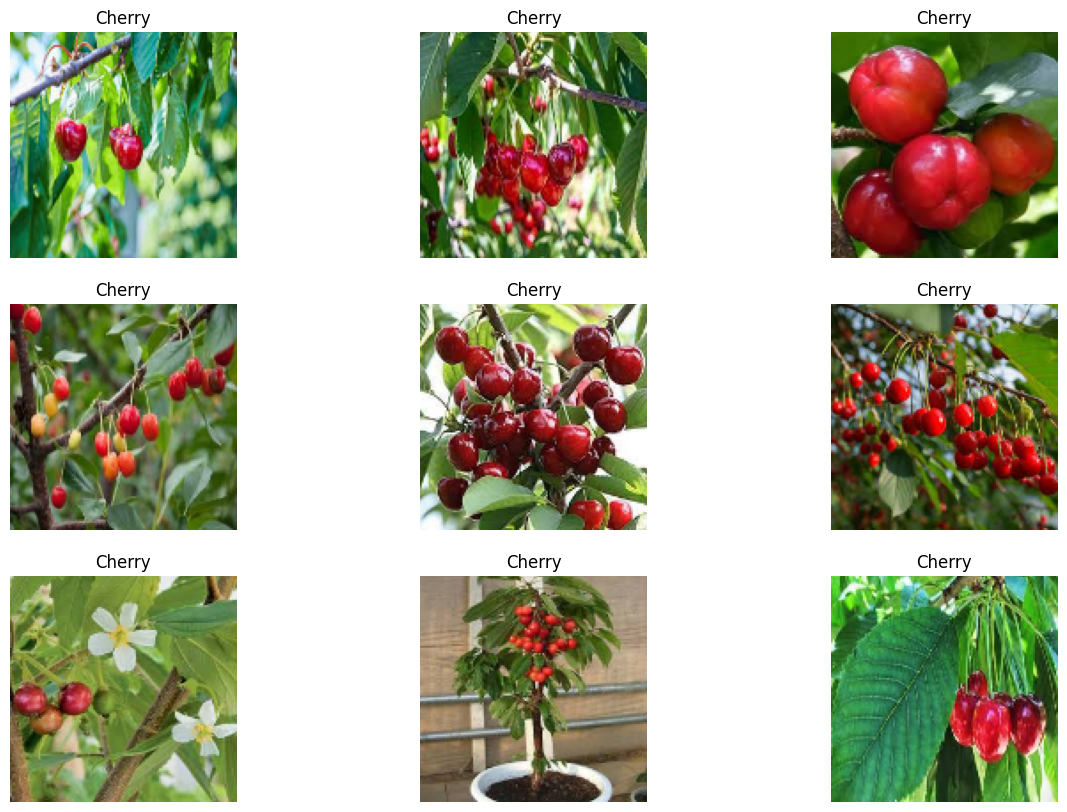

In [47]:
# Utilisation

# Exemple de chemin (à adapter)
dataset_folder = "/content/drive/MyDrive/Agricultural-crops/"  # Doit contenir des sous-dossiers par classe

# Chargement
images, labels, classes = load_images_from_drive(
    folder_path=dataset_folder,
    img_size=(128, 128),
    max_images=1000  # Limiter à 1000 images par classe
)

# Vérification
print(f"\nDimensions des données : {images.shape}")
print(f"Exemple de label : {labels[0]} ({classes[labels[0]]})")

# Visualisation
plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
    plt.axis('off')
plt.show()